In [82]:
# work environment: jl2815
import pandas as pd
import pickle
import sys
import os
gems_tco_path = "/Users/joonwonlee/Documents/GEMS_TCO-1/src"
sys.path.append(gems_tco_path)
#  sys.path
# !pip install numpy==2.0

from GEMS_TCO import data_map_by_hour


# work with jl2815 environment
import xarray as xr # for netCDF4 
import pandas as pd
import numpy as np
from netCDF4 import Dataset

# Ignore warnings due to duplicated dimension names
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="xarray")
from pathlib import Path


from GEMS_TCO import configuration as config
from GEMS_TCO import data_map_by_hour


Make orbit maps:

year =2024 or 2023   
for month in range(start,end+1)   

In [123]:
class
# input_base = "/Volumes/Backup Plus/Extracted_data/"       MAC: working from portable disk requires permission, figure out later
# base_path = "C:\\Users\\joonw\\TCO\\GEMS_data"    MSI notebook
base_path = config.mac_data_load_path   
output_path = base_path
#lat_start, lat_end, lon_start, lon_end = 5, 10, 110, 120

lat_start, lat_end, lon_start, lon_end = 4.9, 10.1, 109.9, 124.1

# years = [2023,2024]
years = [2024] 
months = list( range(7,8))
# Loop through months
for year in years:
    for month in months:  
        try:
            # Construct filenames dynamically
            month_str = f"{month:02d}"  # Ensure month is zero-padded
            if month == 2 and year==2023:
                day_str = "0128"  # Handle February specifically
            elif month ==2 and year==2024:
                day_str = "0129"
            else:
                day_str = "0131" if (month in [1, 3, 5, 7, 8, 10, 12]) else "0130"
    
            input_filename = f"data_{year}/data_{str(year)[2:]}_{month_str}_{day_str}_N{lat_start}{lat_end}_E{lon_start}{lon_end}.csv"
            
            input_filepath = os.path.join(base_path, input_filename)
            
            # Read data
            print(f"Reading file: {input_filepath}")
            df = pd.read_csv(input_filepath)

            # Process data
            instance = data_map_by_hour.center_matching_hour(df, lat_start, lat_end, lon_start, lon_end)
            orbit_map = instance.group_data_by_orbits()
            
            output_path = os.path.join(base_path, f'pickle_{year}')

            # Ensure output directory exists
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            # Save pickle
            output_filename = f"orbit_map{str(year)[2:]}_{month_str}.pkl"
            output_filepath = os.path.join(output_path, output_filename)
            with open(output_filepath, 'wb') as pickle_file:
                pickle.dump(orbit_map, pickle_file)
            
            print(f"Successfully processed and saved data for year {str(year)[2:]} month {month_str}.")
        except FileNotFoundError:
            print(f"Warning: File {input_filename} not found. Skipping.")
        except Exception as e:
            print(f"Error processing file {input_filename}: {e}")


Reading file: /Users/joonwonlee/Documents/GEMS_DATA/data_2024/data_24_07_0131_N4.910.1_E109.9124.1.csv
Successfully processed and saved data for year 24 month 07.


### Now we should investigate whether there is a data showing lot of missing in certain range of latitude and longitude.

In [124]:
import pickle

with open(output_filepath, 'rb') as pickle_file:
    data_map_hour = pickle.load(pickle_file)


# /Users/joonwonlee/Documents/GEMS_DATA/pickle_2024

Longitude

July-24
based on below it seems like 113.5-123.5 has smallest missing set.

July-23
It seems 111-124 is good enough for almost all days except day 21: 111-122.92



109.90028 124.09987


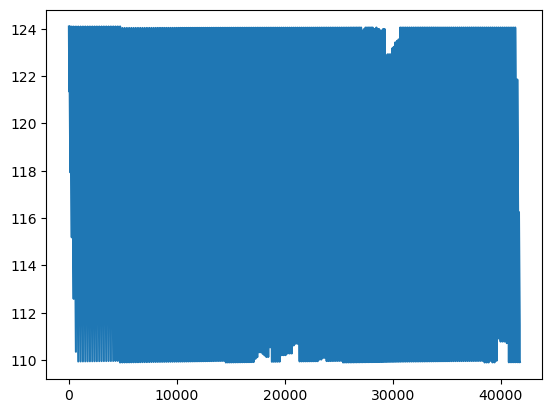

In [116]:
key_list = list( data_map_hour.keys() )

i=20
# 2024 July 0,1,2: 113-124, 5: 113-123 6:113.431- 123.5, 26:110-123 29,30: 110:122.5
# 2023 July 10,11: 111-124, 20: 111-122.92
sdf = data_map_hour[key_list[i]]

from matplotlib import pyplot as plt  

print( sdf['Longitude'].min(), sdf['Longitude'].max())
plt.plot( sdf['Longitude'])

Look closer 

In [ ]:

plt.plot(sdf.iloc[29500:29700]['Longitude'])

# sdf.iloc[43500:]['Longitude'].min()

# sdf.iloc[29500:29700]['Longitude'].max()

Latitude

Longitude is the one we should worry about

4.9001527 10.09973


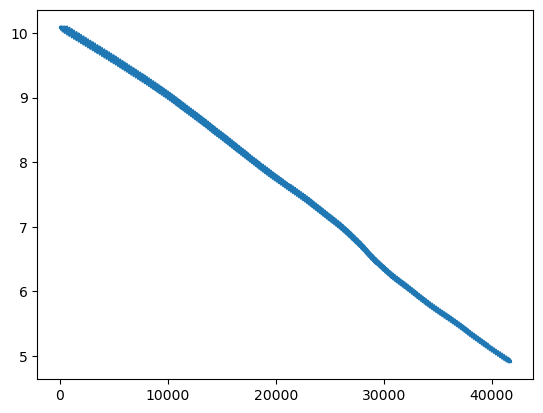

In [122]:

print( sdf['Latitude'].min(), sdf['Latitude'].max())
plt.plot( sdf['Latitude'])